In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

In [18]:
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [36]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

648

In [20]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

units = "matric"

In [21]:
#response = requests.get(query_url + "London")
#result = response.json()
#print(result)
#humidity = result["main"]["humidity"]
#humidity 

In [22]:
query_url = f"{base_url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=84dc2b35fdf8c174bdceba6b0104d1f3&units=matric&q='

In [7]:
#use for loops identify 500+ info
data =[]
count =0
for city in cities:
    result =requests.get(query_url + city).json()
    count =count +1
    try:
        max_tem = result["main"]['temp_max']
        humidity = result["main"]["humidity"]
        cloud = result["clouds"]["all"]
        wind = result['wind']['speed']
        lat = result['coord']['lat']
        lon = result['coord']['lon']
        country = result['sys']['country']
        date = result['dt']
        data.append([city,max_tem,humidity,cloud,wind,lat,lon,country,date])
        print(f"counter {count} || {date}")
    except:
        print("city not found")
    

counter 1 || 1577071782
counter 2 || 1577071782
counter 3 || 1577071782
counter 4 || 1577071782
counter 5 || 1577071782
counter 6 || 1577071783
counter 7 || 1577071783
counter 8 || 1577071783
counter 9 || 1577071783
counter 10 || 1577071783
counter 11 || 1577071556
counter 12 || 1577071783
counter 13 || 1577071510
counter 14 || 1577071783
counter 15 || 1577071783
city not found
counter 17 || 1577071783
counter 18 || 1577071783
counter 19 || 1577071783
counter 20 || 1577071506
counter 21 || 1577071784
counter 22 || 1577071784
counter 23 || 1577071784
counter 24 || 1577071784
counter 25 || 1577071784
counter 26 || 1577071784
counter 27 || 1577071784
counter 28 || 1577071784
counter 29 || 1577071784
counter 30 || 1577071784
counter 31 || 1577071784
counter 32 || 1577071785
counter 33 || 1577071629
counter 34 || 1577071785
counter 35 || 1577071785
counter 36 || 1577071785
counter 37 || 1577071564
counter 38 || 1577071785
city not found
counter 40 || 1577071785
counter 41 || 1577071785
coun

counter 340 || 1577071810
counter 341 || 1577071810
counter 342 || 1577071810
counter 343 || 1577071811
counter 344 || 1577071811
counter 345 || 1577071811
counter 346 || 1577071811
counter 347 || 1577071811
city not found
counter 349 || 1577071811
counter 350 || 1577071811
city not found
counter 352 || 1577071811
counter 353 || 1577071812
counter 354 || 1577071812
counter 355 || 1577071812
counter 356 || 1577071812
counter 357 || 1577071812
city not found
counter 359 || 1577071812
counter 360 || 1577071812
counter 361 || 1577071812
counter 362 || 1577071812
counter 363 || 1577071812
city not found
counter 365 || 1577071666
city not found
counter 367 || 1577071813
counter 368 || 1577071813
counter 369 || 1577071813
counter 370 || 1577071813
counter 371 || 1577071813
counter 372 || 1577071642
counter 373 || 1577071813
counter 374 || 1577071813
counter 375 || 1577071813
counter 376 || 1577071813
city not found
city not found
counter 379 || 1577071814
counter 380 || 1577071814
counter 381

In [25]:
data_df=pd.DataFrame(data,columns=["City","Max Temp","Humidity","Cloudiness","Wind Speed","Lat","Lng","Country", "Date"])

data_df
#plt.scatter(data_df["Lat"],data_df["Max Temp"],c="lightblue",edgecolor='black')

,City,Max Temp,Humidity,Cloudiness,Wind Speed,Lat,Lng,Country,Date
0,bonavista,263.71,82,98,3.13,48.65,-53.11,CA,1577071782
1,touros,298.15,78,20,2.60,-5.20,-35.46,BR,1577071782
2,east london,292.15,82,14,3.60,-33.02,27.91,ZA,1577071782
3,kodiak,278.15,80,1,3.10,39.95,-94.76,US,1577071782
4,thompson,254.15,84,20,1.00,55.74,-97.86,CA,1577071782
...,...,...,...,...,...,...,...,...,...
531,selikhino,251.29,88,100,3.13,50.37,137.51,RU,1577071834
532,cervo,290.94,97,100,1.53,-22.19,-46.24,BR,1577071834
533,vanimo,301.19,75,100,1.80,-2.67,141.30,PG,1577071834
534,mount isa,314.15,16,0,5.70,-20.73,139.49,AU,1577071834


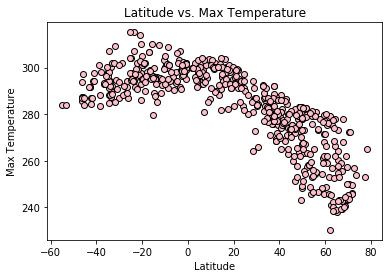

In [32]:
#Latitude vs. Temperature Plot
plt.scatter(data_df["Lat"],data_df["Max Temp"],c="Pink",edgecolor='black')
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.savefig("Latitude vs. Temperature.png")
plt.show()

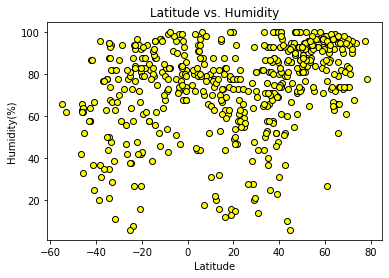

In [33]:
#Latitude vs. Humidity Plot
plt.scatter(data_df["Lat"],data_df["Humidity"],c="Yellow",edgecolor='black')
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("Latitude vs. Humidity.png")
plt.show()

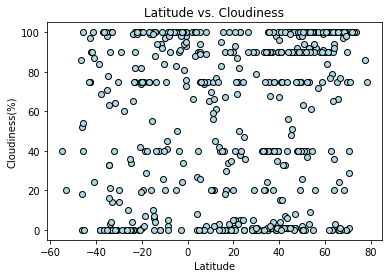

In [34]:
#Latitude vs. Cloudiness Plot
plt.scatter(data_df["Lat"],data_df["Cloudiness"],c="lightblue",edgecolor='black')
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("Latitude vs. Cloudiness.png")
plt.show()

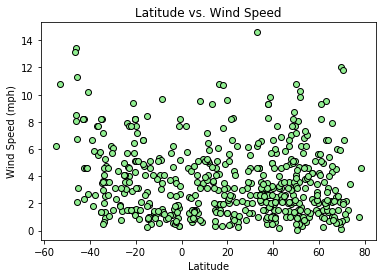

In [35]:
# Latitude vs. Wind Speed Plot
plt.scatter(data_df["Lat"],data_df["Wind Speed"],c="Lightgreen",edgecolor='black')
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Latitude vs. Wind Speed.png")
plt.show()

# Analysis

- Observed trend 1

Latitude and Temperature have a downhill pattern in the plot, this indicates a negative relationship, as the       temperature increase the latitude tend to decrease.
  
- Observed trend 2

Latitude has almost nothing to do with cloudiness.
  
- Observed trend 3

The Humidity tend to be growing more when latitude increase; on the contrary, the wind speed tend to be lower when latitude increase.